<a href="https://colab.research.google.com/github/mohanasamanya/FakeNewsDetection/blob/main/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Naive Bayes Results ===
Accuracy: 0.9339643652561247
Confusion Matrix:
 [[4402  267]
 [ 326 3985]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      4669
           1       0.94      0.92      0.93      4311

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980


=== Random Forest Results ===
Accuracy: 0.9885300668151448
Confusion Matrix:
 [[4629   40]
 [  63 4248]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4669
           1       0.99      0.99      0.99      4311

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


=== Cross-Validation ===
Naive Bayes 5-Fold CV Scores: [0.93193207 0.93582962 0.93791759

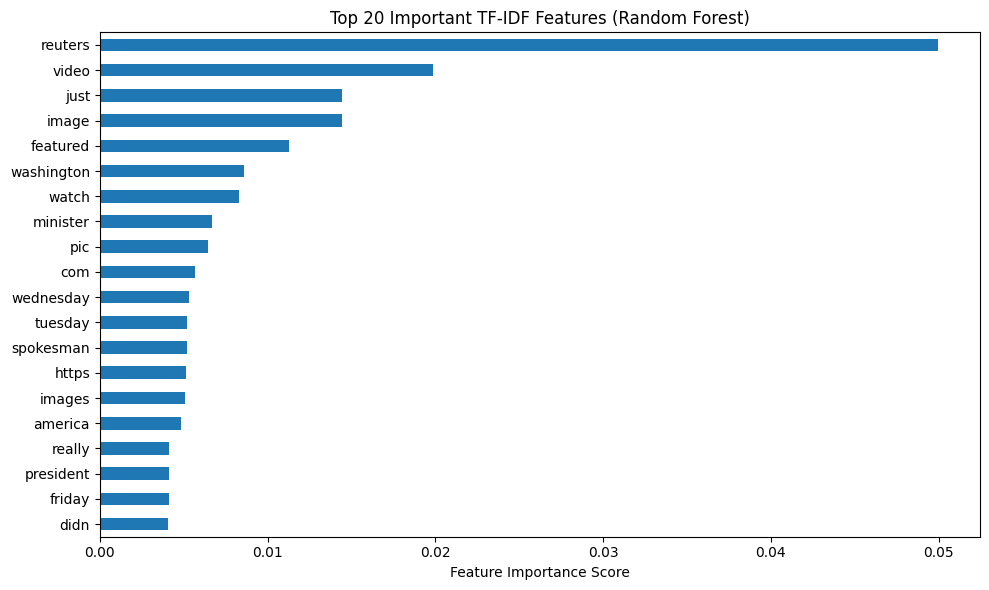

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Load datasets
real_news = pd.read_csv("True.csv")
fake_news = pd.read_csv("Fake.csv")

# Add labels
real_news["label"] = 1  # Real
fake_news["label"] = 0  # Fake

# Combine and shuffle
data = pd.concat([real_news, fake_news], ignore_index=True)
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Combine title and text for feature input
data["content"] = data["title"] + " " + data["text"]

X = data["content"]
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

tfidf = TfidfVectorizer(stop_words="english", max_df=0.7)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)


# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_preds = nb_model.predict(X_test_vec)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vec, y_train)
rf_preds = rf_model.predict(X_test_vec)


print("=== Naive Bayes Results ===")
print("Accuracy:", accuracy_score(y_test, nb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_preds))
print("Classification Report:\n", classification_report(y_test, nb_preds))

print("\n=== Random Forest Results ===")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))


print("\n=== Cross-Validation ===")

# Naive Bayes CV
nb_cv_scores = cross_val_score(nb_model, X_train_vec, y_train, cv=5, scoring="accuracy")
print("Naive Bayes 5-Fold CV Scores:", nb_cv_scores)
print("Mean Accuracy (Naive Bayes): {:.4f}".format(nb_cv_scores.mean()))

# Random Forest CV
rf_cv_scores = cross_val_score(rf_model, X_train_vec, y_train, cv=5, scoring="accuracy")
print("\nRandom Forest 5-Fold CV Scores:", rf_cv_scores)
print("Mean Accuracy (Random Forest): {:.4f}".format(rf_cv_scores.mean()))


importances = rf_model.feature_importances_
feature_names = tfidf.get_feature_names_out()
feature_importances = pd.Series(importances, index=feature_names)

# Top 20 features
top_features = feature_importances.sort_values(ascending=False)[:20]

# Plot
plt.figure(figsize=(10, 6))
top_features.plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 20 Important TF-IDF Features (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.tight_layout()
plt.show()
